In [1]:
import numpy as np
import pandas as pd
import pyvista as pv
import matplotlib.pyplot as plt

In [55]:
df = np.array(pd.read_csv('channels_3d.csv', header=None)).T.reshape(20,16,128*128)
df = df[::-1]
df = df.reshape(20,16,128,128)
df.shape

(20, 16, 128, 128)

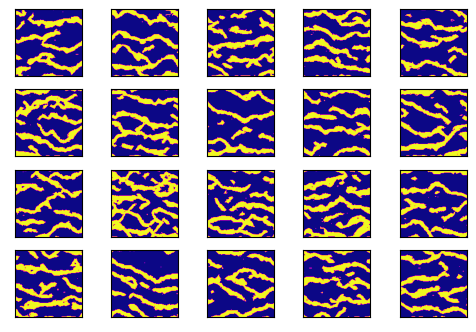

In [74]:
plt.figure(figsize=(6,4))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(df[i,0,:,:], cmap='plasma')
    plt.xticks([]); plt.yticks([])
plt.show()

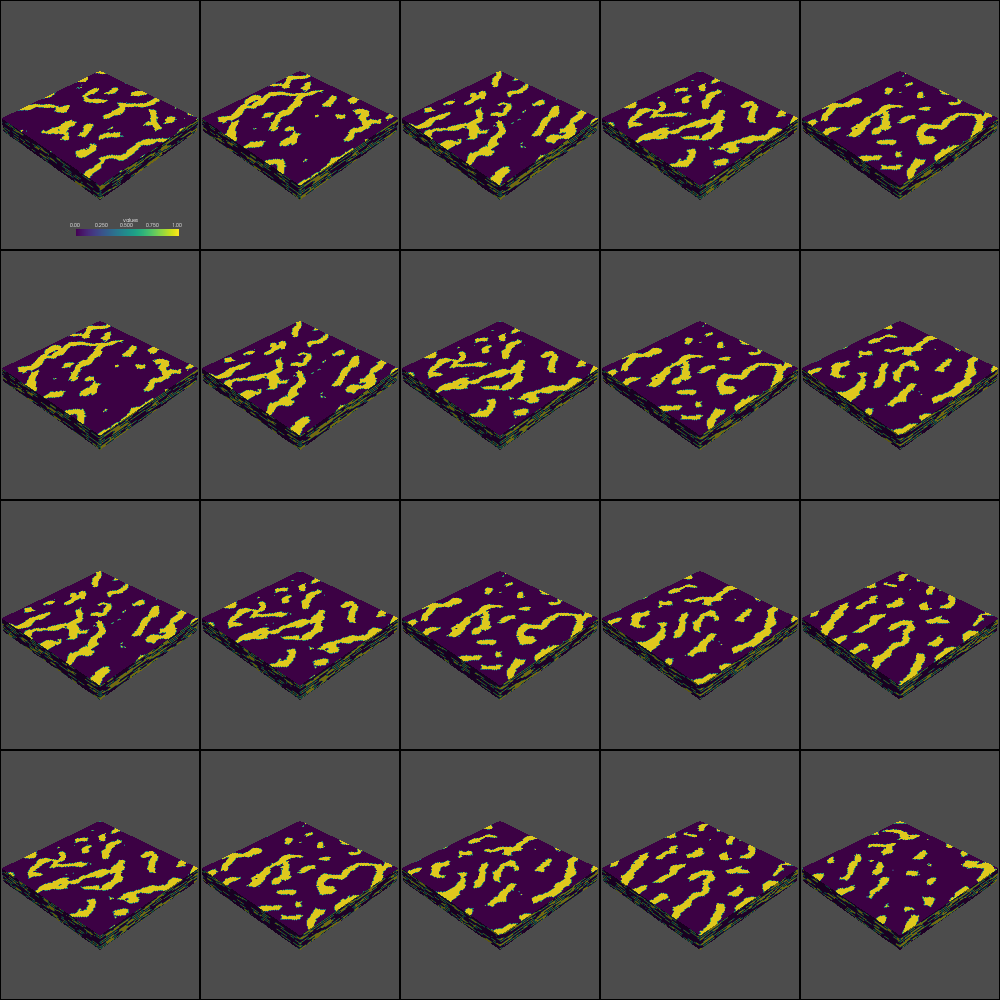

In [115]:
pl = pv.Plotter(shape=(4,5))
for i in range(4):
    for j in range(5):
        pl.subplot(i,j)
        pl.add_mesh(df[i+j].T)
pl.show(window_size=(1000,1000), jupyter_backend='static', interactive=True)